In [1]:
!pip download nltk
!pip install textblob

  File was already downloaded c:\users\subil\desktop\proj 3 - clean\nltk-3.5.zip
  File was already downloaded c:\users\subil\desktop\proj 3 - clean\click-7.1.2-py2.py3-none-any.whl
  File was already downloaded c:\users\subil\desktop\proj 3 - clean\joblib-0.16.0-py3-none-any.whl
  File was already downloaded c:\users\subil\desktop\proj 3 - clean\regex-2020.7.14-cp37-cp37m-win_amd64.whl
  File was already downloaded c:\users\subil\desktop\proj 3 - clean\tqdm-4.48.0-py2.py3-none-any.whl
Successfully downloaded nltk click joblib regex tqdm


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\subil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\subil\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [3]:
from textblob import Word

In [4]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tree import Tree
from nltk.chunk.api import ChunkParserI
import spacy
import en_core_web_sm

In [5]:
df = pd.read_csv('final_data.csv')
df

,Unnamed: 0,name,year,url,text
0,0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,\n\nUnited States Supreme Court\nMARBURY v. MA...
1,1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nGIBBONS v. OG...
2,2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nWORCESTER v. ...
3,3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,\n\nUnited States Supreme Court\nDRED SCOTT v....
4,4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,\n\nUnited States Supreme Court\nMUNN v. STATE...
5,5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,\n\nUnited States Supreme Court\nLOCHNER v. PE...
6,6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nABRAMS v. U S...
7,7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nCOM. OF MASSA...
8,8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nBROWN v. BOAR...
9,9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nBUCK v. BELL(...


In [6]:
#remove '\n' and add space in it
df = df.replace('\n',' ', regex=True)
df

,Unnamed: 0,name,year,url,text
0,0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,United States Supreme Court MARBURY v. MADIS...
1,1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court GIBBONS v. OGDEN...
2,2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,United States Supreme Court WORCESTER v. STA...
3,3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,United States Supreme Court DRED SCOTT v. SA...
4,4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,United States Supreme Court MUNN v. STATE OF...
5,5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,United States Supreme Court LOCHNER v. PEOPL...
6,6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court ABRAMS v. U S(19...
7,7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court COM. OF MASSACHU...
8,8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,United States Supreme Court BROWN v. BOARD O...
9,9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court BUCK v. BELL(192...


In [7]:
#text1 = df['text'][0]
#text1.to_csv('test.csv', index = False)

In [8]:
# make it lowercase
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

#remove numbers
df['text'] = df['text'].str.replace('\d+', '')
df['text'] 

0     united states supreme court marbury v madison ...
1     united states supreme court gibbons v ogden no...
2     united states supreme court worcester v state ...
3     united states supreme court dred scott v sandf...
4     united states supreme court munn v state of il...
5     united states supreme court lochner v people o...
6     united states supreme court abrams v u s no  a...
7     united states supreme court com of massachuset...
8     united states supreme court brown v board of e...
9     united states supreme court buck v bell no  ar...
10    united states supreme court proprietors of cha...
11    united states supreme court near v state of mi...
12    united states supreme court wickard v filburn ...
13    united states supreme court mapp v ohio no  ar...
14    united states supreme court engel v vitale no ...
15    united states supreme court gideon v wainwrigh...
16    united states supreme court reynolds v sims no...
17    united states supreme court atlanta motel 

In [9]:
#df.update(df[['text']].applymap("'{}'".format))


In [10]:
#remove words if length less than 1
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['text']

0     united states supreme court marbury madison ar...
1     united states supreme court gibbons ogden no a...
2     united states supreme court worcester state of...
3     united states supreme court dred scott sandfor...
4     united states supreme court munn state of illi...
5     united states supreme court lochner people of ...
6     united states supreme court abrams no argued d...
7     united states supreme court com of massachuset...
8     united states supreme court brown board of edu...
9     united states supreme court buck bell no argue...
10    united states supreme court proprietors of cha...
11    united states supreme court near state of minn...
12    united states supreme court wickard filburn no...
13    united states supreme court mapp ohio no argue...
14    united states supreme court engel vitale no ar...
15    united states supreme court gideon wainwright ...
16    united states supreme court reynolds sims no a...
17    united states supreme court atlanta motel 

In [11]:
#lemmatization and taking root of verbs only

#!pip install -U textblob
import nltk
#nltk.download('wordnet')
from textblob import Word

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))

df['text']

0     unite state supreme court marbury madison argu...
1     unite state supreme court gibbons ogden no arg...
2     unite state supreme court worcester state of g...
3     unite state supreme court dred scott sandford ...
4     unite state supreme court munn state of illino...
5     unite state supreme court lochner people of st...
6     unite state supreme court abrams no argue deci...
7     unite state supreme court com of massachusetts...
8     unite state supreme court brown board of educa...
9     unite state supreme court buck bell no argue a...
10    unite state supreme court proprietors of charl...
11    unite state supreme court near state of minnes...
12    unite state supreme court wickard filburn no a...
13    unite state supreme court mapp ohio no argue m...
14    unite state supreme court engel vitale no argu...
15    unite state supreme court gideon wainwright no...
16    unite state supreme court reynolds sims no arg...
17    unite state supreme court atlanta motel un

In [12]:
#stopwords

#!pip install nltk
#nltk.download()

from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['text'][0]

'unite state supreme court marbury madison argue decide february december term william marbury dennis ramsay robert townsend hooe william harper counsel us severally move court rule jam madison secretary state unite state show cause mandamus issue command cause deliver respectively several commission justices peace district columbia motion support affidavits follow facts notice motion give mr madison mr adams late president unite state nominate applicants senate advice consent appoint justices peace district columbia senate advise consent appointments commission due form sign say president appoint justices seal unite state due form affix say commission secretary state applicants request mr madison deliver say commission comply request say commission withhold applicants make application mr madison secretary state unite state office information whether commission sign seal aforesaid explicit satisfactory information give answer inquiry either secretary state officer department state appl

In [13]:
text = df['text']
text

0     unite state supreme court marbury madison argu...
1     unite state supreme court gibbons ogden argue ...
2     unite state supreme court worcester state ga a...
3     unite state supreme court dred scott sandford ...
4     unite state supreme court munn state illinois ...
5     unite state supreme court lochner people state...
6     unite state supreme court abrams argue decide ...
7     unite state supreme court com massachusetts me...
8     unite state supreme court brown board educatio...
9     unite state supreme court buck bell argue apri...
10    unite state supreme court proprietors charles ...
11    unite state supreme court near state minnesota...
12    unite state supreme court wickard filburn argu...
13    unite state supreme court mapp ohio argue marc...
14    unite state supreme court engel vitale argue a...
15    unite state supreme court gideon wainwright ar...
16    unite state supreme court reynolds sims argue ...
17    unite state supreme court atlanta motel un

In [14]:
#tokenization
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = text.apply(word_tokenize)
text_tokens

0     [unite, state, supreme, court, marbury, madiso...
1     [unite, state, supreme, court, gibbons, ogden,...
2     [unite, state, supreme, court, worcester, stat...
3     [unite, state, supreme, court, dred, scott, sa...
4     [unite, state, supreme, court, munn, state, il...
5     [unite, state, supreme, court, lochner, people...
6     [unite, state, supreme, court, abrams, argue, ...
7     [unite, state, supreme, court, com, massachuse...
8     [unite, state, supreme, court, brown, board, e...
9     [unite, state, supreme, court, buck, bell, arg...
10    [unite, state, supreme, court, proprietors, ch...
11    [unite, state, supreme, court, near, state, mi...
12    [unite, state, supreme, court, wickard, filbur...
13    [unite, state, supreme, court, mapp, ohio, arg...
14    [unite, state, supreme, court, engel, vitale, ...
15    [unite, state, supreme, court, gideon, wainwri...
16    [unite, state, supreme, court, reynolds, sims,...
17    [unite, state, supreme, court, atlanta, mo

In [15]:
#remove brackets 
text_tokens_df = text_tokens.apply(lambda x: ",".join(x) if isinstance(x, list) else x)
text_tokens_df[4]

'unite,state,supreme,court,munn,state,illinois,argue,decide,october,munn,state,illinois,us,error,supreme,court,state,illinois,constitution,illinois,adopt,contain,follow,reference,inspection,grain,storage,thereof,public,warehouse,article,xiiiwarehouses,section,elevators,storehouses,grain,property,store,compensation,whether,property,store,keep,separate,declare,public,warehouse,sect,owner,lessee,manager,every,public,warehouse,situate,town,city,less,one,hundred,thousand,inhabitants,shall,make,weekly,statements,oath,officer,designate,law,keep,post,conspicuous,place,office,warehouse,shall,also,file,copy,public,examination,place,shall,designate,law,statement,shall,correctly,set,forth,amount,grade,every,kind,grain,warehouse,together,property,may,store,therein,warehouse,receipt,issue,time,make,statement,outstanding,therefor,shall,copy,post,warehouse,note,daily,change,may,make,quantity,grade,grain,warehouse,different,grade,grain,ship,separate,lot,shall,us,mix,inferior,superior,grade,without,cons

In [16]:
#text.str.rsplit()

In [17]:
text_tokens_df = pd.DataFrame(text_tokens_df)

text_tokens_df = text_tokens_df.rename(columns={'text': 'tokens'})
text_tokens_df

,tokens
0,"unite,state,supreme,court,marbury,madison,argu..."
1,"unite,state,supreme,court,gibbons,ogden,argue,..."
2,"unite,state,supreme,court,worcester,state,ga,a..."
3,"unite,state,supreme,court,dred,scott,sandford,..."
4,"unite,state,supreme,court,munn,state,illinois,..."
5,"unite,state,supreme,court,lochner,people,state..."
6,"unite,state,supreme,court,abrams,argue,decide,..."
7,"unite,state,supreme,court,com,massachusetts,me..."
8,"unite,state,supreme,court,brown,board,educatio..."
9,"unite,state,supreme,court,buck,bell,argue,apri..."


In [18]:
#get POS tags with NLTK
pos_tag = text_tokens.apply(nltk.pos_tag)
pos_tag

0     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
1     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
2     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
3     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
4     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
5     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
6     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
7     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
8     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
9     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
10    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
11    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
12    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
13    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
14    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
15    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
16    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
17    [(unite, JJ), (state, NN), (supreme, JJ), 

In [19]:
#find out the meaning of specific tags

#nltk.download('tagsets')
nltk.help.upenn_tagset("JJ")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [20]:
#convert series to DF
pos_tag_df = pd.Series(pos_tag,
               name="POS_tags")
pos_tag_df.to_frame()

,POS_tags
0,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
1,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
2,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
3,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
4,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
5,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
6,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
7,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
8,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
9,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."


In [21]:
pos_tag_df.head()

0    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
1    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
2    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
3    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
4    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
Name: POS_tags, dtype: object

In [22]:
len(pos_tag_df)

45

In [23]:
#merge the two dataframes together

text_and_tokens = pd.concat([df, text_tokens_df], axis=1)
text_and_tokens

,Unnamed: 0,name,year,url,text,tokens
0,0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,unite state supreme court marbury madison argu...,"unite,state,supreme,court,marbury,madison,argu..."
1,1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court gibbons ogden argue ...,"unite,state,supreme,court,gibbons,ogden,argue,..."
2,2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,unite state supreme court worcester state ga a...,"unite,state,supreme,court,worcester,state,ga,a..."
3,3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,unite state supreme court dred scott sandford ...,"unite,state,supreme,court,dred,scott,sandford,..."
4,4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,unite state supreme court munn state illinois ...,"unite,state,supreme,court,munn,state,illinois,..."
5,5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,unite state supreme court lochner people state...,"unite,state,supreme,court,lochner,people,state..."
6,6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court abrams argue decide ...,"unite,state,supreme,court,abrams,argue,decide,..."
7,7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court com massachusetts me...,"unite,state,supreme,court,com,massachusetts,me..."
8,8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,unite state supreme court brown board educatio...,"unite,state,supreme,court,brown,board,educatio..."
9,9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court buck bell argue apri...,"unite,state,supreme,court,buck,bell,argue,apri..."


In [24]:
text.count()

45

### NER

In [25]:
#Apply NER for only one case
nlp = spacy.load('en_core_web_sm')

sentence = text[8]

doc = nlp(sentence)
for ent in doc.ents:
    print(ent.text, ent.label_)


state supreme court brown board ORG
december DATE
negro children equal protection ORG
white negro school ORG
fourteenth amendment LAW
fourteenth amendment LAW
american NORP
plessy ferguson PERSON
us GPE
us GPE
briggs PERSON
al elliott PERSON
december DATE
december DATE
davis PERSON
al county school board ORG
virginia GPE
december reargued december DATE
al belton PERSON
al certiorari supreme court ORG
delaware GPE
december DATE
robert carter PERSON
thurgood marshall PERSON
spottswood robinson iii PERSON
jack greenberg argue PERSON
jack greenberg thurgood marshall PERSON
brief robert carter thurgood marshall spottswood robinson iii louis PERSON
jack greenberg george hay PERSON
william ming jr constance PERSON
baker motley PERSON
harold boulware PERSON
oliver hill PERSON
george johnson PERSON
nos ORG
miller PERSON
nos arthur PERSON
paul wilson PERSON
general kansas ORG
brief harold fatzer PERSON
john davis PERSON
brief callison PERSON
south carolina GPE
robert mcc figg jr rogers PERSON
wi

In [26]:
#Apply NER for tokens of one case
text_tokens = text_tokens.apply(lambda x: ",".join(x) if isinstance(x, list) else x)


nlp = spacy.load('en_core_web_sm')

sentence = text_tokens[20]

doc1 = nlp(sentence)
for ent in doc1.ents:
    print(ent.text, ent.label_)


state ORG
supreme ORG
love GPE
virginia GPE
argue GPE
april DATE
decide GPE
june DATE
virginias ORG
va GPE
cohen PERSON
philip GPE
hirschkop GPE
argue GPE
hirschkop GPE
mcilwaine PERSON
iii PERSON
virginia GPE
argue GPE
cause GPE
robert PERSON
button GPE
kenneth PERSON
patty PERSON
william PERSON
japanese NORP
american NORP
citizens,league ORG
amici ORG
william PERSON
william PERSON
catholic NORP
al, GPE
us GPE
robert PERSON
carter PERSON
andrew PERSON
weinberger,national,association ORG
jack PERSON
greenberg PERSON
jam GPE
nabrit GPE
iii GPE
michael PERSON
bruton PERSON
ralph PERSON
state ORG
north,carolina GPE
justice ORG
warren PERSON
state GPE
virginia GPE
us GPE
june DATE
two CARDINAL
virginia GPE
jeter GPE
negro GPE
richard PERSON
district GPE
columbia GPE
virginia GPE
abide GPE
caroline GPE
county GPE
october DATE
us GPE
caroline GPE
county GPE
grand GPE
virginias ORG
january DATE
one,year DATE
years DATE
virginia GPE
district GPE
columbia GPE
november DATE
october DATE
eastern 

## Building a knowledge graph

In [27]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [59]:
candidate_sentences = pd.read_csv("test.csv")
candidate_sentences.shape

(45, 1)

In [60]:
candidate_sentences['text'].sample(5)

17    unite state supreme court atlanta motel unite state argue october decide december appellant owner large motel atlanta georgia restrict clientele white persons threefourths transient interstate tra...
2     unite state supreme court worcester state ga argue decide january us writ error superior court county gwinnett state georgia december legislature state georgia pass follow act act prevent exercise...
29    unite state supreme court buckley valeo argue november decide january footnote together buckley et al valeo secretary unite state senate et al appeal unite state district court district columbia f...
32    unite state supreme court strickland washington argue january decide may respondent plead guilty florida trial court indictment include three capital murder charge plea colloquy respondent tell tr...
38    unite state supreme court massachusetts et al environmental protection agency et al argue november decide april base respect scientific opinion welldocumented rise global

In [44]:
doc = nlp(text[0])

for tok in doc:
  print(tok.text, "...", tok.dep_)

unite ... amod
state ... compound
supreme ... compound
court ... compound
marbury ... compound
madison ... nsubj
argue ... ROOT
decide ... ccomp
february ... compound
december ... compound
term ... compound
william ... compound
marbury ... compound
dennis ... nsubj
ramsay ... ccomp
robert ... compound
townsend ... compound
hooe ... compound
william ... compound
harper ... compound
counsel ... dobj
us ... nsubj
severally ... advmod
move ... relcl
court ... compound
rule ... compound
jam ... compound
madison ... compound
secretary ... compound
state ... compound
unite ... compound
state ... compound
show ... dobj
cause ... advcl
mandamus ... compound
issue ... compound
command ... compound
cause ... nsubj
deliver ... ccomp
respectively ... advmod
several ... amod
commission ... compound
justices ... compound
peace ... compound
district ... compound
columbia ... compound
motion ... compound
support ... compound
affidavits ... compound
follow ... compound
facts ... dobj
notice ... ROOT
mot

whether ... mark
appoint ... compound
office ... compound
appoint ... compound
law ... nsubj
continue ... advcl
office ... dobj
five ... nummod
years ... npadvmod
entitle ... compound
possession ... compound
evidence ... compound
office ... compound
complete ... nsubj
become ... advcl
property ... nmod
second ... amod
section ... nmod
second ... amod
article ... compound
constitution ... nsubj
declare ... ROOT
president ... nsubj
shall ... aux
nominate ... ccomp
advice ... compound
consent ... compound
senate ... dobj
shall ... aux
appoint ... ROOT
ambassadors ... dobj
public ... compound
minister ... compound
consuls ... compound
officer ... nsubj
unite ... ccomp
state ... dobj
whose ... poss
appointments ... nsubj
otherwise ... advmod
provide ... relcl
third ... amod
section ... dobj
declare ... ROOT
shall ... aux
commission ... compound
officer ... pobj
unite ... ccomp
state ... compound
act ... dobj
congress ... nmod
direct ... amod
secretary ... compound
state ... nsubj
keep ... c

state ... dobj
shall ... aux
make ... xcomp
record ... dobj
shall ... aux
affix ... nsubj
say ... conj
seal ... nmod
civil ... amod
commission ... compound
officer ... compound
unite ... amod
state ... compound
appoint ... compound
president ... compound
provide ... nsubj
say ... ccomp
seal ... nsubj
shall ... aux
affix ... compound
commission ... nsubj
shall ... aux
sign ... ccomp
president ... dobj
unite ... xcomp
state ... compound
instrument ... compound
act ... dobj
without ... prep
special ... amod
warrant ... compound
president ... pobj
therefor ... prep
signature ... compound
warrant ... nmod
affix ... nmod
great ... amod
seal ... compound
commission ... nmod
great ... amod
seal ... nmod
affix ... nmod
instrument ... nmod
complete ... amod
attest ... amod
act ... pobj
suppose ... ROOT
public ... amod
notoriety ... compound
verity ... nmod
presidential ... amod
signature ... nsubj
never ... neg
affix ... ccomp
till ... mark
commission ... compound
sign ... compound
signature ...

transmit ... dobj
afterwards ... advmod
lose ... amod
copy ... nsubj
would ... aux
complete ... ccomp
evidence ... dobj
original ... amod
exist ... compound
appointment ... nsubj
make ... conj
original ... amod
transmit ... nsubj
indeed ... advmod
appear ... ccomp
us ... nmod
original ... amod
mislay ... compound
office ... compound
state ... compound
circumstance ... nsubj
would ... aux
affect ... ccomp
operation ... compound
copy ... compound
requisites ... dobj
perform ... advcl
authorize ... dobj
record ... compound
officer ... compound
record ... compound
instrument ... dobj
whatever ... det
order ... compound
purpose ... nsubj
give ... relcl
instrument ... compound
law ... dobj
consider ... advcl
record ... dobj
although ... mark
manual ... amod
labour ... compound
insert ... compound
book ... nsubj
keep ... nsubj
purpose ... dobj
may ... aux
perform ... ccomp
case ... compound
commission ... compound
law ... compound
order ... compound
secretary ... compound
state ... compound
r

redress ... compound
pursue ... compound
inquiry ... nmod
first ... amod
question ... dobj
present ... amod
whether ... mark
arrange ... pcomp
us ... compound
class ... compound
case ... nsubj
come ... advcl
description ... compound
damnum ... compound
absque ... amod
injuriaa ... compound
loss ... nsubj
without ... prep
injury ... compound
description ... compound
case ... pobj
never ... neg
consider ... ccomp
believe ... nsubj
never ... neg
consider ... ccomp
comprehend ... compound
offices ... nsubj
trust ... ccomp
honour ... compound
profit ... compound
office ... compound
justice ... compound
peace ... compound
district ... compound
columbia ... compound
office ... nsubj
therefore ... advmod
worthy ... amod
attention ... compound
guardianship ... compound
laws ... nsubj
receive ... ccomp
attention ... compound
guardianship ... dobj
create ... conj
special ... amod
act ... dobj
congress ... nsubj
secure ... relcl
far ... amod
laws ... nsubj
give ... ccomp
security ... compound
pers

legal ... amod
discretion ... dobj
nothing ... dobj
perfectly ... advmod
clear ... amod
act ... npadvmod
politically ... advmod
examinable ... amod
specific ... amod
duty ... compound
assign ... compound
law ... compound
individual ... nsubj
right ... advmod
depend ... ROOT
upon ... prep
performance ... compound
duty ... pobj
seem ... advcl
equally ... advmod
clear ... amod
individual ... nsubj
consider ... oprd
injure ... ccomp
right ... advmod
resort ... compound
laws ... compound
country ... pobj
remedy ... compound
rule ... nsubj
let ... ROOT
us ... nsubj
inquire ... nsubj
apply ... ccomp
case ... compound
consideration ... compound
court ... dobj
us ... compound
power ... nsubj
nominate ... conj
senate ... compound
power ... compound
appoint ... compound
person ... nsubj
nominate ... ccomp
political ... amod
power ... compound
exercise ... compound
president ... compound
accord ... compound
discretion ... nsubj
make ... ccomp
appointment ... amod
exercise ... dobj
whole ... amod
p

place ... compound
persons ... compound
list ... nsubj
perform ... advcl
head ... compound
department ... compound
question ... nsubj
might ... aux
properly ... advmod
settle ... ccomp
congress ... compound
pass ... dobj
act ... dobj
february ... npadvmod
make ... conj
duty ... compound
secretary ... compound
war ... compound
conjunction ... compound
attorney ... compound
general ... nsubj
take ... ccomp
measure ... nsubj
might ... aux
necessary ... advmod
obtain ... ccomp
adjudication ... compound
supreme ... compound
court ... nsubj
unite ... ccomp
us ... dative
state ... nmod
validity ... nmod
right ... amod
claim ... compound
act ... dobj
aforesaid ... ccomp
passage ... compound
act ... compound
mandamus ... nsubj
move ... nmod
direct ... amod
secretary ... compound
war ... compound
command ... compound
place ... compound
pension ... compound
list ... compound
person ... compound
state ... compound
report ... compound
judge ... nsubj
therefore ... advmod
much ... amod
reason ... ns

jurisdiction ... nsubj
make ... ccomp
constitution ... compound
form ... dobj
without ... prep
substance ... pobj
affirmative ... amod
word ... nmod
often ... advmod
operation ... nmod
negative ... amod
object ... compound
affirm ... compound
case ... nsubj
negative ... amod
exclusive ... amod
sense ... nsubj
must ... aux
give ... relcl
operation ... dobj
can ... aux
not ... neg
presume ... advcl
clause ... compound
constitution ... compound
intend ... dobj
without ... prep
effect ... pobj
therefore ... advmod
construction ... ROOT
inadmissible ... advmod
unless ... mark
word ... nsubj
require ... advcl
us ... dobj
solicitude ... compound
convention ... compound
respect ... ccomp
peace ... nmod
foreign ... amod
power ... nsubj
induce ... relcl
provision ... compound
supreme ... compound
court ... nsubj
take ... ROOT
original ... amod
jurisdiction ... compound
case ... dobj
might ... aux
suppose ... conj
affect ... xcomp
yet ... advmod
clause ... nsubj
would ... aux
proceed ... ccomp
pr

consider ... acl
court ... compound
one ... nummod
fundamental ... amod
principles ... compound
society ... nsubj
therefore ... advmod
lose ... ccomp
sight ... compound
consideration ... compound
subject ... amod
act ... compound
legislature ... nmod
repugnant ... amod
constitution ... nsubj
void ... ROOT
notwithstanding ... prep
invalidity ... compound
bind ... compound
court ... compound
oblige ... pobj
give ... csubj
effect ... compound
word ... dobj
though ... mark
law ... nsubj
constitute ... advcl
rule ... dobj
operative ... amod
law ... dobj
would ... aux
overthrow ... pcomp
fact ... dobj
establish ... compound
theory ... dobj
would ... aux
seem ... ROOT
first ... amod
view ... compound
absurdity ... oprd
gross ... amod
insist ... nsubj
shall ... aux
however ... advmod
receive ... conj
attentive ... amod
consideration ... dobj
emphatically ... advmod
province ... compound
duty ... compound
judicial ... amod
department ... nsubj
say ... ROOT
law ... nsubj
apply ... ccomp
rule ...

oath ... dobj
become ... ccomp
equally ... advmod
crime ... attr
also ... advmod
entirely ... advmod
unworthy ... amod
observation ... compound
declare ... nsubj
shall ... aux
supreme ... compound
law ... compound
land ... compound
constitution ... nsubj
first ... amod
mention ... compound
laws ... nsubj
unite ... ccomp
state ... dobj
generally ... advmod
shall ... aux
make ... ROOT
pursuance ... compound
constitution ... compound
rank ... nsubj
thus ... advmod
particular ... amod
phraseology ... compound
constitution ... compound
unite ... compound
state ... compound
confirm ... nsubj
strengthen ... ccomp
principle ... nsubj
suppose ... ccomp
essential ... amod
write ... compound
constitutions ... compound
law ... nmod
repugnant ... amod
constitution ... compound
void ... compound
court ... nsubj
well ... advmod
departments ... nsubj
bind ... ccomp
instrument ... compound
rule ... dobj
must ... aux
discharge ... ccomp


In [45]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [56]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [62]:
entity_pairs = []

for i in tqdm(candidate_sentences['text']):
  entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [01:57<00:00,  2.61s/it]


In [64]:
entity_pairs

[['well  departments', 'instrument rule'],
 ['rep footnote footnote tucker bl', 'part appx footnote'],
 ['state georgia judgment', 'special judgment execution'],
 ['cor rev vol', 'washington vol'],
 ['satisfy bishops', 'bill'],
 ['latter regulation hours aspect', 'charge inequality'],
 ['right mr justice brandeis', 'right constitution state'],
 ['coequal department authority', 'original dismiss affirm'],
 ['first procedures instance', 'july revise rule us'],
 ['asylum others aim', 'nearly justice butler dissent'],
 ['attorneygeneral sitwell yo coll', 'full  statement'],
 ['pursuant make act', 'laws minn'],
 ['amount loan result', 'basic wheat federal register'],
 ['nothing', 'us'],
 ['divine reliance providence', 'live  us'],
 ['rel simon pa', 'cir footnote us'],
 ['cong us page globe', 'cong st us'],
 ['hear house committee supra', 'cong rec us'],
 ['freund supreme court', 'state us'],
 ['even investigation interrogation', 'us'],
 ['criminality act', 'actor mclaughlin florida'],
 ['cr

In [65]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [66]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['text'])]

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [01:26<00:00,  1.93s/it]


In [67]:
pd.Series(relations).value_counts()

see                          6
make                         4
think                        1
give                         1
point airborne               1
apply present                1
begin                        1
us                           1
mean                         1
possess original             1
crowninshield                1
inform                       1
online                       1
challenge                    1
believe                      1
allow                        1
argue                        1
describe                     1
hear                         1
footnote                     1
express                      1
engage                       1
unite                        1
convey                       1
work                         1
opinion                      1
think unnecessary            1
reach                        1
wisconsin                    1
connecticut                  1
evidence                     1
point amish                  1
say supe

In [68]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [69]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


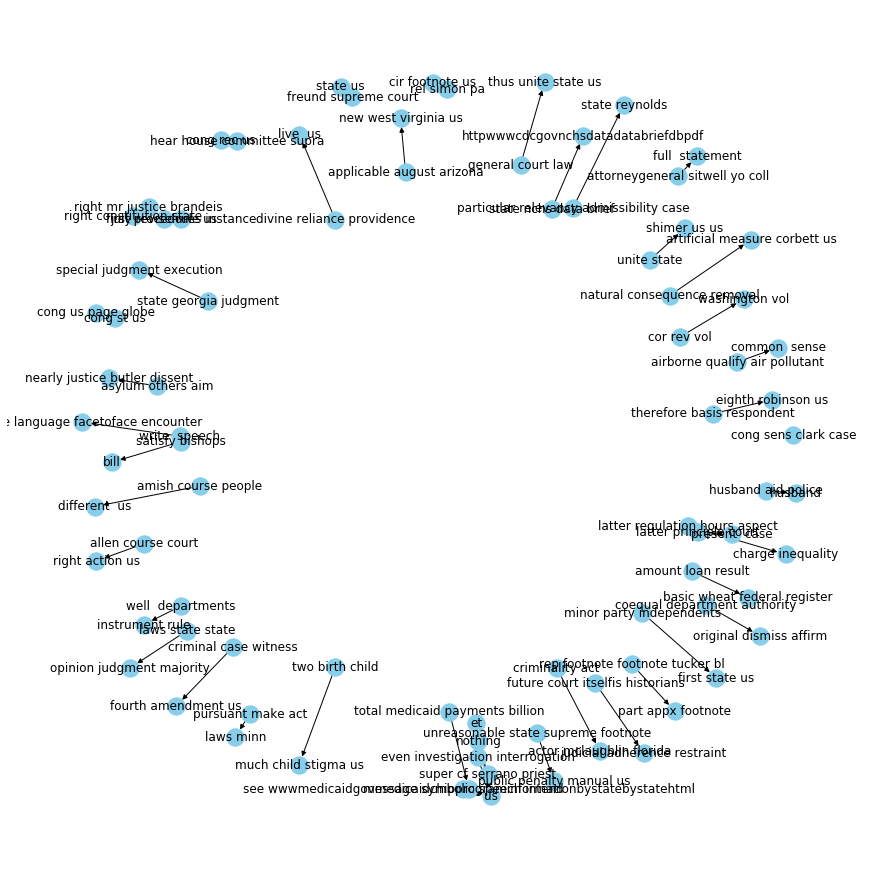

In [70]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

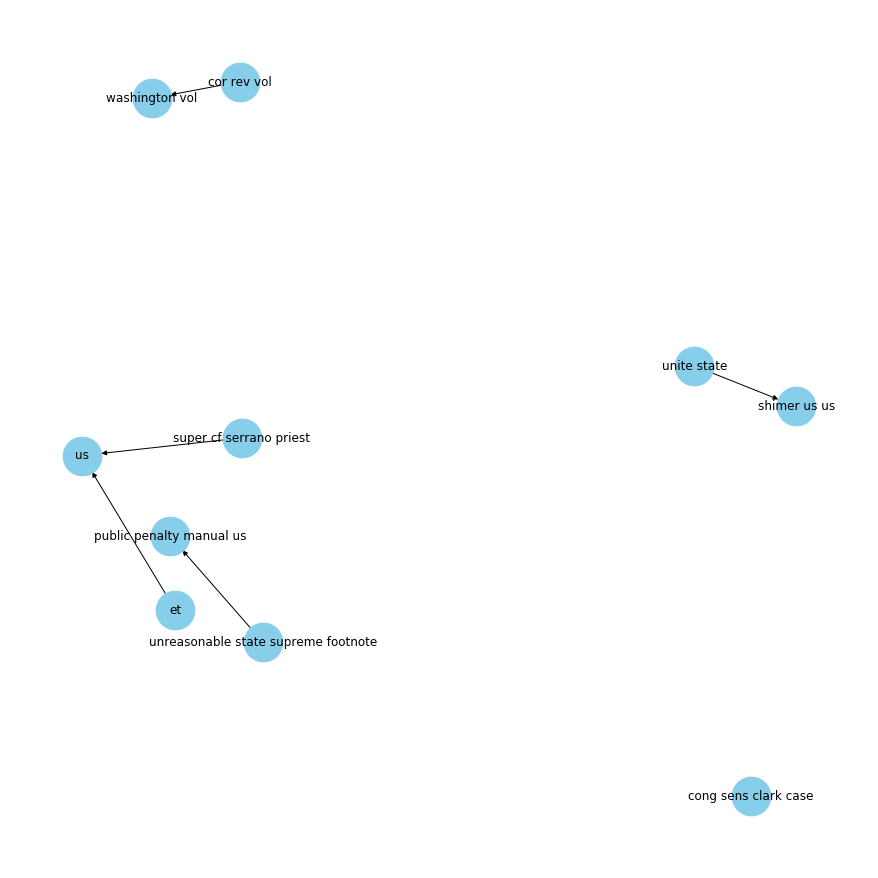

In [73]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="see"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()